# Testing out the Basics of PyTorch with the Titanic Dataset

In [354]:
#imports

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split



In [355]:
# Import data

train_data = pd.read_csv('traindata_clean.csv')
train_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.000000,1,0,7.2500,S
1,2,1,1,1,38.000000,1,0,71.2833,C
2,3,1,3,1,26.000000,0,0,7.9250,S
3,4,1,1,1,35.000000,1,0,53.1000,S
4,5,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.000000,0,0,13.0000,S
887,888,1,1,1,19.000000,0,0,30.0000,S
888,889,0,3,1,29.699118,1,2,23.4500,S
889,890,1,1,0,26.000000,0,0,30.0000,C


In [356]:
# Split Data

features = ['Age', 'Sex', 'Pclass', 'Fare']

X = train_data[features].to_numpy()
y = train_data['Survived'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [357]:
# Converting to Tensors

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.Tensor(y_train)
y_test = torch.Tensor(y_test)
y_train.shape

torch.Size([712])

In [358]:
# Building the Model

model = nn.Sequential(

    nn.Linear(4, 20),
    nn.Softplus(),
    nn.Linear(20, 1),
    nn.Sigmoid()
)



In [359]:
# Hyperparameters, loss function, optimizer

epochs = 5000
learning_rate = 0.001

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)


In [360]:
# Training

loss_list = []

for i in range(epochs):
    optimizer.zero_grad()
    output = model(X_train).squeeze(1)
    loss = criterion(output, y_train)
    loss_list.append(loss.detach().numpy())
    loss.backward()
    optimizer.step()



0.54946506


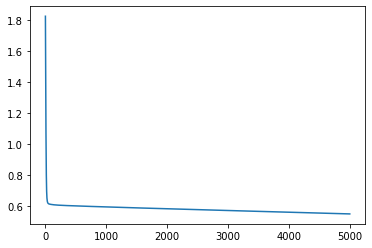

In [361]:
import matplotlib.pyplot as plt

plt.plot(loss_list)
print(loss_list[-1])

In [362]:
# Predictions on Test data

pred = model(X_test).detach().numpy()

pred = np.where(pred < 0.5, 0, 1).squeeze(1)

result = pd.DataFrame({'truth' : y_test, 'predicted' : pred})

result["correct"] = np.where(result.truth == result.predicted, 1, 0)

accuracy = result.correct.sum()/result.shape[0]

print(f" Accuracy: {(accuracy*100).round(2)}%")

 Accuracy: 72.07%


In [363]:
pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0])